# Decision Trees Classifier (Mask, No Mask, Incorrect Mask)

Things to consider:
- Decision trees tend to overfit on data with a large number of features.
- 

## Imports

In [1]:
# import packages
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

import seaborn as sns # for confusion matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # to plot inage, graph

import pickle
import time # for computation time assessment
%matplotlib inline

## Prepare Dataset

### Pickle Dataset

In [2]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

pickle_in = open("data.pickle", "rb")
data = pickle.load(pickle_in) # Data Matrix will serve as X

### Dataset Classification Distribution

In [3]:
print('# of Samples:', len(y))
print('# of Without A Mask:', (y == 0).sum())
print('# of Incorrectly Worn Mask:', (y == 1).sum())
print('# of With A Mask:', (y == 2).sum())

# of Samples: 17687
# of Without A Mask: 5909
# of Incorrectly Worn Mask: 5895
# of With A Mask: 5883


### Convert Numpy to Dataframe

In [4]:
# Get Column Names
cols = []
for i in range(0, len(data[0])):
    cols.append("P" + str(i))

# Convert to Dataframe
numpy_data = data
X = pd.DataFrame(data=numpy_data, columns=[cols])
print(X.head())

y = pd.DataFrame(data=y, columns=["Mask_Target"])
print(y.head())

    P0   P1   P2   P3   P4   P5   P6   P7   P8   P9  ... P4086 P4087 P4088  \
0   20   21   19   22   29   31   37   51   54   37  ...   132   131   106   
1  127  127  125  126   87   69   34   30   33   37  ...   141   156   156   
2   48   43   37   34   34   40   49   83  100  106  ...    79    58    41   
3  184   91   63   25   14   17   15   35   44   41  ...    84    86    53   
4  111  125  126   97  109  140  168  185  166   91  ...   138    61    27   

  P4089 P4090 P4091 P4092 P4093 P4094 P4095  
0   158   125    43    24    21    21    34  
1   149   150   149   145   125   115   103  
2    21    14    19    22    23    20    21  
3    17    13    13    14    11    13    15  
4    35    30    38    34    45    54    48  

[5 rows x 4096 columns]
   Mask_Target
0            0
1            0
2            0
3            0
4            0


### Data Shape

In [5]:
# Shape
print('\nImage Data Shape:', X.shape)
print('Image Data Shape Features:', data.shape)
print('Image Data Shape Target:', y.shape)


Image Data Shape: (17687, 4096)
Image Data Shape Features: (17687, 4096)
Image Data Shape Target: (17687, 1)


### Normalize the Data

In [6]:
# Normalize the pixel values
X = X / 255.0

### Split Train + Test, random_state

In [7]:
# Split our data into testing and training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Print the length and width of our testing data.
print('Length of our Training data: ',len(X_train), '\nLength of our Testing data: ',len(X_test))

Length of our Training data:  14149 
Length of our Testing data:  3538


## Decision Trees Classifier

### Build and Train Decision Trees model

#### Fit Model

In [8]:
# Initialize Decision Trees model
decision_trees = DecisionTreeClassifier()

%timeit
# Use training data to fit Decision Trees model
decision_trees.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier()

#### Predict

In [9]:
%%time
# make prediction on entire test data
predictions_set1 = decision_trees.predict(X_test)

CPU times: user 67 ms, sys: 6.4 ms, total: 73.4 ms
Wall time: 71.4 ms


#### Pickle Predictions

In [10]:
pickle_out = open("predictions_set1_dt.pickle", "wb")
pickle.dump(predictions_set1, pickle_out)
pickle_out.close()

### Performance Metrics

#### Accuracy

In [11]:
print('Decision Trees Accuracy: %.3f' % accuracy_score(y_test, predictions_set1))

Decision Trees Accuracy: 0.828


#### Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.828151498021481')

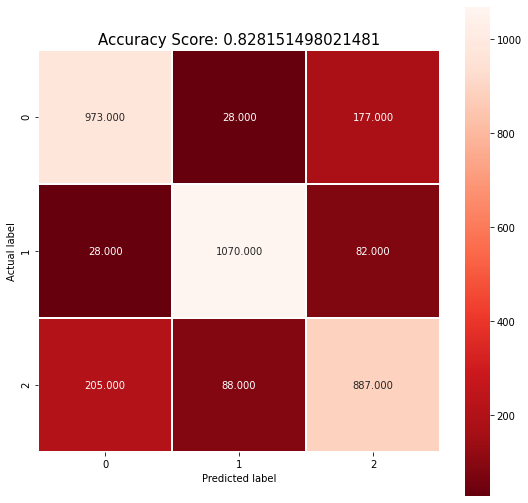

In [12]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set1)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set1))
plt.title(all_sample_title,size=15)

#### Precision

In [13]:
print('Decision Trees Precision: %.3f' % precision_score(y_test, predictions_set1, average='micro'))

Decision Trees Precision: 0.828


#### Recall

In [14]:
print('Decision Trees Recall: %.3f' % recall_score(y_test, predictions_set1, average='micro'))

Decision Trees Recall: 0.828


#### F1 Score

In [15]:
print('Decision Trees F1 Score: %.3f' % f1_score(y_test, predictions_set1, average='micro'))

Decision Trees F1 Score: 0.828


#### Classification Report

In [16]:
print("\nClassification Report\n", classification_report(y_test, predictions_set1))


Classification Report
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      1178
           1       0.90      0.91      0.90      1180
           2       0.77      0.75      0.76      1180

    accuracy                           0.83      3538
   macro avg       0.83      0.83      0.83      3538
weighted avg       0.83      0.83      0.83      3538



#### Visualization of Trees

[Text(121.81862950297959, 214.57894736842104, 'X[1944] <= 0.351\ngini = 0.667\nsamples = 14149\nvalue = [4731, 4715, 4703]'),
 Text(45.87494153549294, 208.85684210526315, 'X[3422] <= 0.512\ngini = 0.371\nsamples = 5018\nvalue = [304, 3878, 836]'),
 Text(31.09707310422937, 203.13473684210527, 'X[2709] <= 0.686\ngini = 0.631\nsamples = 972\nvalue = [224, 278, 470]'),
 Text(25.454869595310257, 197.41263157894736, 'X[3548] <= 0.686\ngini = 0.566\nsamples = 745\nvalue = [223, 95, 427]'),
 Text(17.316333357802783, 191.69052631578947, 'X[1560] <= 0.265\ngini = 0.523\nsamples = 689\nvalue = [222, 49, 418]'),
 Text(8.033205742630326, 185.96842105263158, 'X[3941] <= 0.261\ngini = 0.528\nsamples = 417\nvalue = [190, 13, 214]'),
 Text(2.4717556131170233, 180.24631578947367, 'X[2333] <= 0.249\ngini = 0.367\nsamples = 158\nvalue = [34, 3, 121]'),
 Text(0.8988202229516449, 174.52421052631578, 'X[3451] <= 0.963\ngini = 0.033\nsamples = 60\nvalue = [1, 0, 59]'),
 Text(0.44941011147582244, 168.802105263

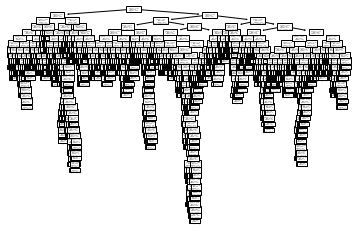

In [17]:
from sklearn.tree import plot_tree
plot_tree(decision_trees) 

## Dimensionality Reduction

### Principal Component Analysis, Keep 90% of variance

In [18]:
# from sklearn import feature_selection
from sklearn.decomposition import PCA # Dimensionality Reduction

In [31]:
# pca - keep 90% of variance
pca = PCA(0.90)
X_transformed = pca.fit_transform(X_train)
X_test_transformed = pca.transform(X_test)
print(X_transformed.shape)

(14149, 153)


In [32]:
print(X_train.shape)

(14149, 4096)


In [33]:
# Initialize Decision Trees model
decision_trees_pca = DecisionTreeClassifier()

%timeit
# Use training data to fit Decision Trees model
decision_trees_pca.fit(X_transformed, y_train.values.ravel())

DecisionTreeClassifier()

In [34]:
%%time
# make prediction on entire test data
predictions_set_pca = decision_trees_pca.predict(X_test_transformed)

CPU times: user 2.38 ms, sys: 1.76 ms, total: 4.14 ms
Wall time: 2.7 ms



Classification Report
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1178
           1       0.82      0.84      0.83      1180
           2       0.68      0.68      0.68      1180

    accuracy                           0.76      3538
   macro avg       0.76      0.76      0.76      3538
weighted avg       0.76      0.76      0.76      3538



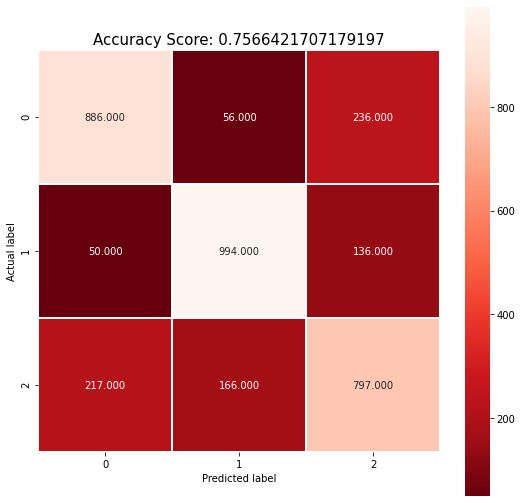

In [35]:
# Calculate Confusion Matrix
cm = confusion_matrix(y_test, predictions_set_pca)

plt.figure(figsize=(9,9))
# Heatmap visualization of accuracy
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Reds_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_set_pca))
plt.title(all_sample_title,size=15)

print("\nClassification Report\n", classification_report(y_test, predictions_set_pca))